## Import Data and Libraries 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
message=pd.read_csv('sms_spam.csv', sep=',')
message.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis

In [3]:
message.describe()

,type,text
count,5574,5574
unique,2,5160
top,ham,"Sorry, I'll call later"
freq,4827,30


In [4]:
message.groupby('type').describe()

text                                                               
     count unique                                                top freq
type                                                                     
ham   4827   4518                             Sorry, I'll call later   30
spam   747    642  Please call our customer service representativ...    4

In [5]:
message['length']=message['text'].apply(len)
message.head()

,type,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Data Visualization

<AxesSubplot:ylabel='Frequency'>

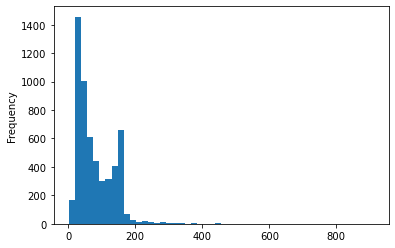

In [6]:
message['length'].plot(bins=50,kind='hist')

In [7]:
message.length.describe()

count    5574.000000
mean       80.444923
std        59.841828
min         2.000000
25%        36.000000
50%        61.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [8]:
message[message['length']==910]['text'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

## Text Pre-Processing

In [9]:
import string
mess = 'sample message!...'
nopunc=[char for char in mess if char not in string.punctuation]
nopunc=''.join(nopunc)
print(nopunc)

sample message


In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deepak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [12]:
nopunc.split()

['sample', 'message']

In [13]:
def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [14]:
message['text'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: text, dtype: object

## Feature Engineering & TFIDF

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# bow_transformer = CountVectorizer(analyzer=text_process).fit(message['text'])
# print(len(bow_transformer.vocabulary_))

In [ ]:
# messages_bow = bow_transformer.transform(message['text'])

In [ ]:
# from sklearn.feature_extraction.text import TfidfTransformer
# messages_tfidf=tfidf_transformer.transform(messages_bow)
# print(messages_tfidf.shape)

In [ ]:
# With Tfidftransformer you will systematically compute word counts using CountVectorizer 
# and then compute the Inverse Document Frequency (IDF) values and only then compute the Tf-idf scores.

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer 

In [16]:
# TfidfTransformer method-
#TF
#instantiate CountVectorizer() 
cv=CountVectorizer() 
# this steps generates word counts for the words in your docs 
word_count_vector=cv.fit_transform(message['text'])

In [17]:
word_count_vector.shape

(5574, 8713)

In [18]:
#IDF
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [19]:
# print idf values 
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 
# sort ascending 
df_idf.sort_values(by=['idf_weights'])

E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,idf_weights
to,2.194748
you,2.253301
the,2.682925
in,2.927780
and,2.946448
...,...
hat,8.932900
hassling,8.932900
hasnt,8.932900
havbeen,8.932900


In [20]:
# Compute TFIDF values-
# count matrix 
count_vector=cv.transform(message['text']) 
# tf-idf scores 
tf_idf_vector=tfidf_transformer.transform(count_vector)

In [21]:
feature_names = cv.get_feature_names() 
#get tfidf vector for first document 
first_document_vector=tf_idf_vector[0] 
#print the scores 
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 
df.sort_values(by=["tfidf"],ascending=False)

E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,tfidf
amore,0.326468
jurong,0.326468
buffet,0.311649
cine,0.275803
bugis,0.275803
...,...
elephant,0.000000
electricity,0.000000
elections,0.000000
election,0.000000


In [ ]:
# With Tfidfvectorizer on the contrary, you will do all three steps at once. Under the hood,
# it computes the word counts, IDF values, and Tf-idf scores all using the same dataset.

In [ ]:
# TfidfVectorizer method-
from sklearn.feature_extraction.text import TfidfVectorizer 
# settings that you use for count vectorizer will go here 
tfidf_vectorizer=TfidfVectorizer(use_idf=True) 
# just send in all your docs here 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(message['text'])

## Naive Bayes Classifier

In [22]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(tf_idf_vector,message['type'])

## Predictions

In [24]:
all_predictions = spam_detect_model.predict(tf_idf_vector)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


## Model Performance

In [25]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(message['type'],all_predictions))
print(confusion_matrix(message['type'],all_predictions))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      4827
        spam       1.00      0.82      0.90       747

    accuracy                           0.98      5574
   macro avg       0.99      0.91      0.94      5574
weighted avg       0.98      0.98      0.98      5574

[[4827    0]
 [ 133  614]]
